# original code

In [ ]:
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout, Dense, MaxPooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Ensure the dataset path is correct
dataset_path = r"C:\Users\Ramachandra\OneDrive\Desktop\new weed\images"

# Load labels
labels_df = pd.read_csv(os.path.join(dataset_path, r"C:\Users\Ramachandra\OneDrive\Desktop\new weed\labels.csv"))

# Print columns to check the structure
print(labels_df.columns)

# Print the first few rows to inspect the structure
print(labels_df.head())

# Adjust based on the actual column names
image_column = 'Filename'  # Replace with the actual column name for images
label_column = 'Label'  # Replace with the actual column name for labels

# Initialize data and labels lists
data = []
labels = []

# LabelEncoder initialization
encoder = LabelEncoder()
labels_df[label_column] = encoder.fit_transform(labels_df[label_column])

# Load images and labels
for index, row in labels_df.iterrows():
    img_path = os.path.join(dataset_path, row[image_column])
    img = Image.open(img_path)
    img = img.resize((128, 128))
    img = np.array(img)
    if img.shape == (128, 128, 3):
        data.append(img)
        labels.append(row[label_column])  # Append label directly

data = np.array(data)
labels = np.array(labels)

# Convert labels to categorical
labels = np.eye(np.max(labels) + 1)[labels]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# Model definition
num_classes = labels.shape[1]  # Number of unique classes
model = Sequential([
    Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3), padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use num_classes here
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=30, batch_size=40, validation_data=(x_test, y_test), verbose=1)

# Plot accuracy and loss
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plotting accuracy vs validation accuracy
plt.plot(smooth_curve(history.history['accuracy']), label='Train')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Validation')
plt.title('Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plotting loss vs validation loss
plt.plot(smooth_curve(history.history['loss']), label='Train')
plt.plot(smooth_curve(history.history['val_loss']), label='Validation')
plt.title('Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


# Depreciated code for faster execution


Index(['Filename', 'Label', 'Species'], dtype='object')
                Filename  Label       Species
0  20160928-140314-0.jpg      0  Chinee apple
1  20160928-140337-0.jpg      0  Chinee apple
2  20160928-140731-0.jpg      0  Chinee apple
3  20160928-140747-0.jpg      0  Chinee apple
4  20160928-141107-0.jpg      0  Chinee apple


Epoch 1/3


438/438 [==============================] - 63s 132ms/step - loss: 2.0871 - accuracy: 0.5021 - val_loss: 1.6378 - val_accuracy: 0.5226
Epoch 2/3
438/438 [==============================] - 52s 119ms/step - loss: 1.4584 - accuracy: 0.5292 - val_loss: 1.4693 - val_accuracy: 0.5423
Epoch 3/3
438/438 [==============================] - 51s 116ms/step - loss: 1.3487 - accuracy: 0.5442 - val_loss: 1.3729 - val_accuracy: 0.5537


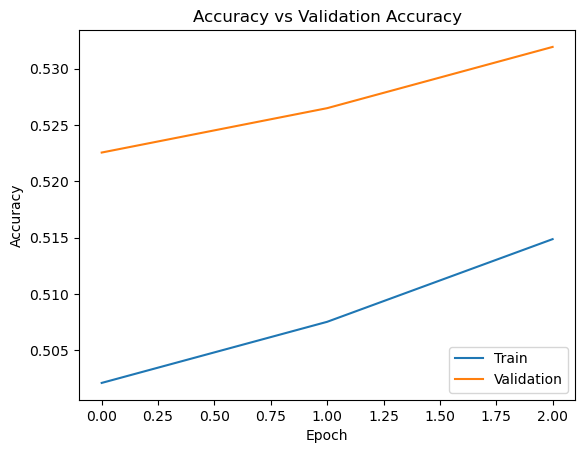

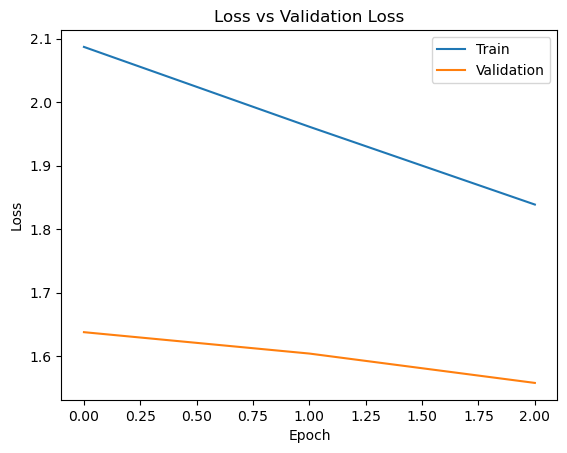

In [1]:
import os
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, GlobalAveragePooling2D, Dropout, Dense, MaxPooling2D
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Ensure the dataset path is correct
dataset_path = r"C:\Users\Ramachandra\OneDrive\Desktop\new weed\images"

# Load labels
labels_df = pd.read_csv(os.path.join(dataset_path, r"C:\Users\Ramachandra\OneDrive\Desktop\new weed\labels.csv"))

# Print columns to check the structure
print(labels_df.columns)

# Print the first few rows to inspect the structure
print(labels_df.head())

# Adjust based on the actual column names
image_column = 'Filename'  # Replace with the actual column name for images
label_column = 'Label'  # Replace with the actual column name for labels

# Initialize data and labels lists
data = []
labels = []

# LabelEncoder initialization
encoder = LabelEncoder()
labels_df[label_column] = encoder.fit_transform(labels_df[label_column])

# Load images and labels
for index, row in labels_df.iterrows():
    img_path = os.path.join(dataset_path, row[image_column])
    img = Image.open(img_path)
    img = img.resize((64, 64))  # Reduced size to 64x64
    img = np.array(img)
    if img.shape == (64, 64, 3):
        data.append(img)
        labels.append(row[label_column])  # Append label directly

data = np.array(data)
labels = np.array(labels)

# Convert labels to categorical
labels = np.eye(np.max(labels) + 1)[labels]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=0)

# Model definition with reduced size
num_classes = labels.shape[1]  # Number of unique classes
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3), padding='same'),  # Reduced filters to 32
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, kernel_size=(3, 3), activation='relu', padding='same'),  # Reduced filters to 64
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),  # Reduced units to 256
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model with reduced epochs
history = model.fit(x_train, y_train, epochs=3, batch_size=32, validation_data=(x_test, y_test), verbose=1)

# Plot accuracy and loss
def smooth_curve(points, factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

# Plotting accuracy vs validation accuracy
plt.plot(smooth_curve(history.history['accuracy']), label='Train')
plt.plot(smooth_curve(history.history['val_accuracy']), label='Validation')
plt.title('Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')
plt.show()

# Plotting loss vs validation loss
plt.plot(smooth_curve(history.history['loss']), label='Train')
plt.plot(smooth_curve(history.history['val_loss']), label='Validation')
plt.title('Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()


In [7]:
from keras.models import load_model
from PIL import Image
import numpy as np


# Load an image from your dataset
image_path = r"C:\Users\Ramachandra\OneDrive\Desktop\new weed\images\20170128-102105-0.jpg"
image = Image.open(image_path)
image = image.resize((64, 64))  # Resize the image to match model input shape
image = np.array(image) / 255.0  # Normalize pixel values

# Add a batch dimension and preprocess for prediction
image = np.expand_dims(image, axis=0)

# Make predictions
predictions = model.predict(image)

# Define a mapping between class indices and labels
class_mapping = { 0: "Weed type 8", 1: "Weed type 1", 2: "Weed type 2", 3: "Weed type 3", 4: "Weed type 4", 5: "Weed type 5", 6: "Weed type 6", 7: "Weed type 7",8: "Not a weed"}

# Decode the predictions and print the result
predicted_class = np.argmax(predictions)
if predicted_class == 8:
    print("Predicted Class: Not a weed")
else:
    print(f"Predicted Class: {class_mapping[predicted_class]}")


1/1 [==============================] - 0s 55ms/step
Predicted Class: Weed type 4
